In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import plotly.express as px


In [32]:
# Read CSV File
df = pd.read_csv (r"wages_by_education.csv")
df.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [33]:
#Display column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             50 non-null     int64  
 1   less_than_hs                     50 non-null     float64
 2   high_school                      50 non-null     float64
 3   some_college                     50 non-null     float64
 4   bachelors_degree                 50 non-null     float64
 5   advanced_degree                  50 non-null     float64
 6   men_less_than_hs                 50 non-null     float64
 7   men_high_school                  50 non-null     float64
 8   men_some_college                 50 non-null     float64
 9   men_bachelors_degree             50 non-null     float64
 10  men_advanced_degree              50 non-null     float64
 11  women_less_than_hs               50 non-null     float64
 12  women_high_school       

QUESTION 1 - •	Are things trending towards females earning as much as males for those with an advanced degree?

QUESITON 2 - •	Does the increase in education affect the increase in salary for both men and women equally?

QUESTION 3 - •	For those with an advanced degree, is there a difference between one of the groups based on race for the last 5 years?

In [34]:
df_ed = df.iloc[:,0:6]
df_ed.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22
1,2021,16.74,22.28,24.92,41.32,53.45
2,2020,17.02,22.70,25.44,41.65,53.74
3,2019,16.11,21.64,24.00,39.61,51.57
4,2018,15.94,21.50,23.70,38.87,51.03


In [35]:
df_ed.columns

Index(['year', 'less_than_hs', 'high_school', 'some_college',
       'bachelors_degree', 'advanced_degree'],
      dtype='object')

In [36]:

fig = px.line(df_ed, x = "year", y = df_ed.columns,title = "Hourly Wage vs Education (1973-2022)")
fig.update_layout(xaxis_title = "Years", yaxis_title = "Hourly Wage", legend_title = "Education Level")
fig.show()


In [38]:
#Only look at last 5 years
last_five = df[df['year']>=2018]

#Unpivot the dataset only looking at advanced degrees by race
df_unpivot = pd.melt(last_five, id_vars='year', value_vars=[
    'white_advanced_degree',
    'black_advanced_degree',
    'hispanic_advanced_degree'])
df_unpivot.head()


,year,variable,value
0,2022,white_advanced_degree,53.30
1,2021,white_advanced_degree,53.62
2,2020,white_advanced_degree,53.80
3,2019,white_advanced_degree,51.81
4,2018,white_advanced_degree,51.80


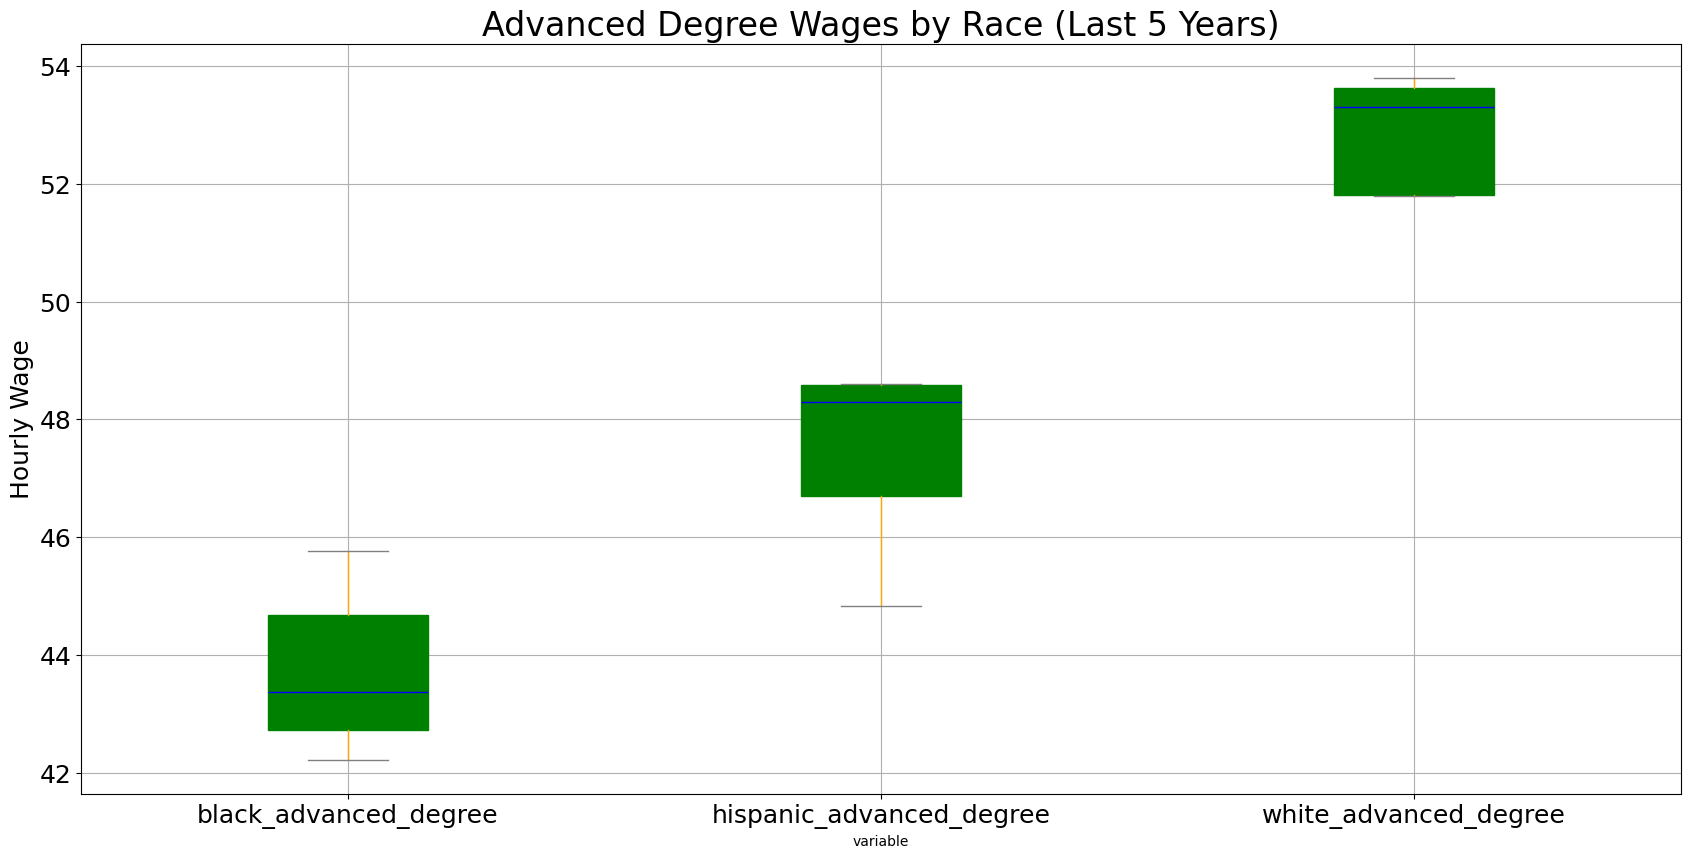

In [39]:
#Color of boxplots
props = dict(boxes="Green", whiskers="Orange", medians="Blue", caps="Gray")

#Create Boxplot
df_unpivot.boxplot("value", by="variable", figsize=(20, 10),fontsize=18,color=props,patch_artist=True)

#Labels on Boxplot
plt.title('Advanced Degree Wages by Race (Last 5 Years)',fontsize=24)
plt.suptitle('')
plt.ylabel('Hourly Wage',fontsize=18)

plt.show()


In [46]:
# Extract individual groups
group0 = df_unpivot[df_unpivot["variable"] == 'black_advanced_degree']["value"]
group1 = df_unpivot[df_unpivot["variable"] == 'hispanic_advanced_degree']["value"]
group2 = df_unpivot[df_unpivot["variable"] == 'white_advanced_degree']["value"]

In [47]:
# Perform the ANOVA
stats.f_oneway(group0, group1, group2)

F_onewayResult(statistic=54.807914488255605, pvalue=9.228834322622075e-07)

In [50]:
#Run ttest against black_advanced_degree vs hispanic_advanced_degree
stats.ttest_ind(group0, group1, equal_var=False)

TtestResult(statistic=-3.728801920810109, pvalue=0.005952927663667684, df=7.882551537760143)

In [22]:
#Unpivot the dataset looking at bachelors degree by race
df_unpivot_bachelors = pd.melt(last_five, id_vars='year', value_vars=[
    'white_bachelors_degree',
    'black_bachelors_degree',
    'hispanic_bachelors_degree'])
df_unpivot_bachelors.head()

,year,variable,value
0,2022,white_bachelors_degree,43.30
1,2021,white_bachelors_degree,43.06
2,2020,white_bachelors_degree,43.16
3,2019,white_bachelors_degree,41.06
4,2018,white_bachelors_degree,40.49


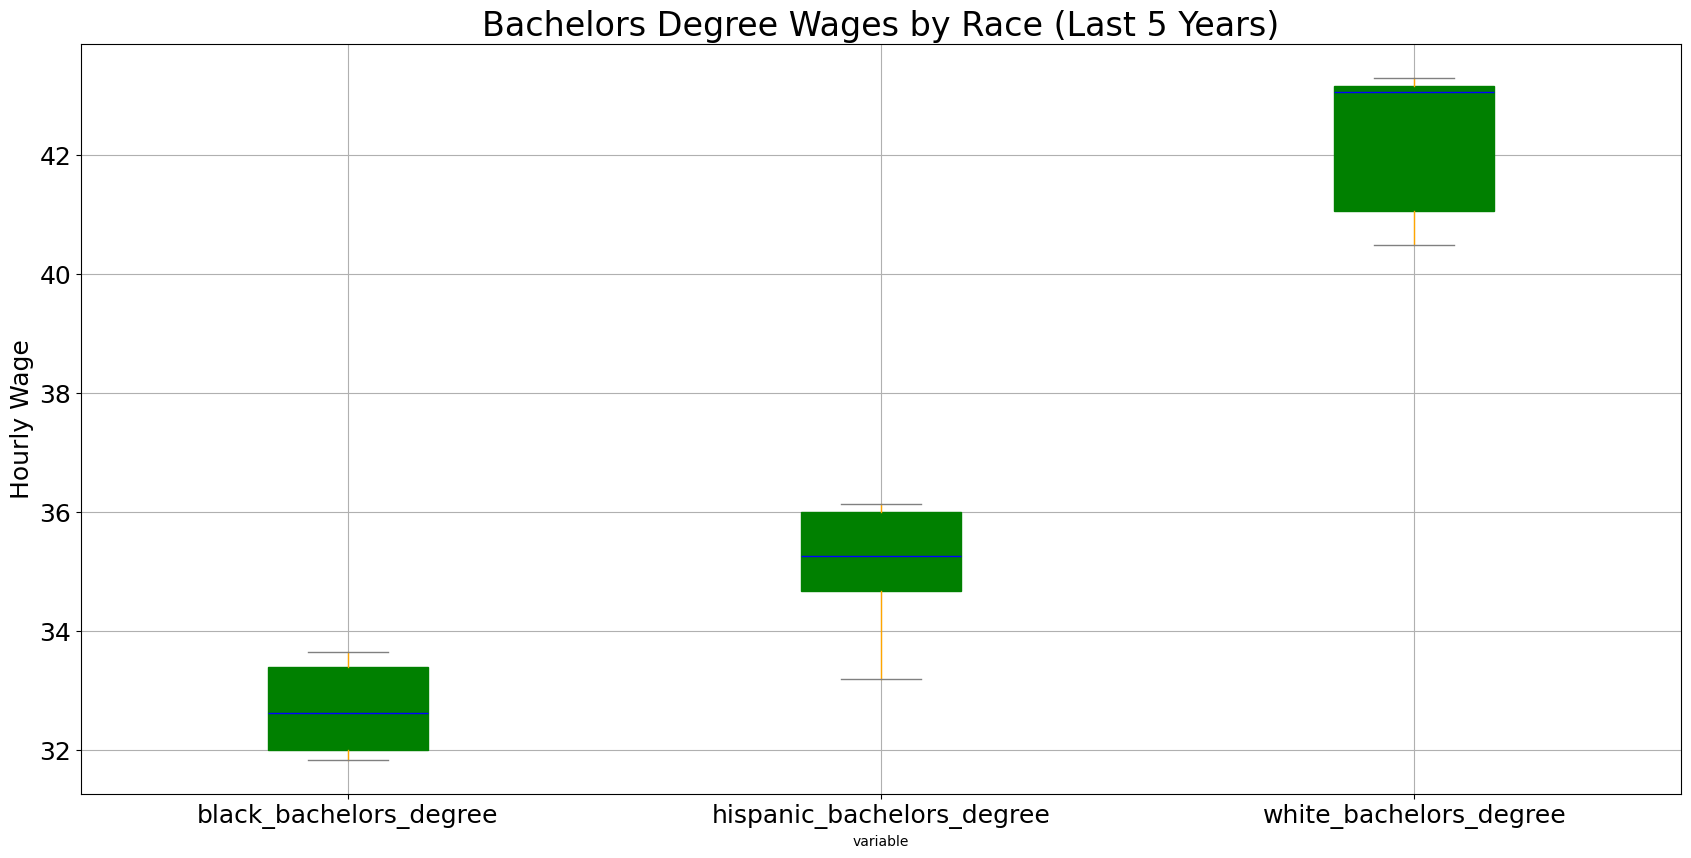

In [23]:
#Color of boxplots
props = dict(boxes="Green", whiskers="Orange", medians="Blue", caps="Gray")

#Create Boxplot
df_unpivot_bachelors.boxplot("value", by="variable", figsize=(20, 10),fontsize=18,color=props,patch_artist=True)

#Labels on Boxplot
plt.title('Bachelors Degree Wages by Race (Last 5 Years)',fontsize=24)
plt.suptitle('')
plt.ylabel('Hourly Wage',fontsize=18)

plt.show()

In [48]:
# Extract individual groups
group3 = df_unpivot_bachelors[df_unpivot_bachelors["variable"] == 'black_bachelors_degree']["value"]
group4 = df_unpivot_bachelors[df_unpivot_bachelors["variable"] == 'hispanic_bachelors_degree']["value"]
group5 = df_unpivot_bachelors[df_unpivot_bachelors["variable"] == 'white_bachelors_degree']["value"]

In [49]:
# Perform the ANOVA
stats.f_oneway(group3, group4, group5)

F_onewayResult(statistic=95.56789221022925, pvalue=4.2498036311925216e-08)

In [51]:
#Run ttest against black_bachelors_degree vs hispanic_bachelors_degree
stats.ttest_ind(group3, group4, equal_var=False)

TtestResult(statistic=-3.6427703022503017, pvalue=0.008212161852051522, df=7.021897118762298)